To address our analysis, we need to respond to the subsequent inquiries:

    Do a greater number of restaurants provide online delivery as opposed to offline services?
    Which types of restaurants are the most favored by the general public?
    What price range is preferred by couples for their dinner at restaurants?


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('zomato_data.csv')
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

In [5]:
df['rate'] = df['rate'].apply(handleRate)

In [6]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,148.0,3.633108,0.402271,2.6,3.30,3.7,3.90,4.6
votes,148.0,264.810811,653.676951,0.0,6.75,43.5,221.75,4884.0
approx_cost(for two people),148.0,418.243243,223.085098,100.0,200.00,400.0,600.00,950.0


<Axes: xlabel='listed_in(type)', ylabel='count'>

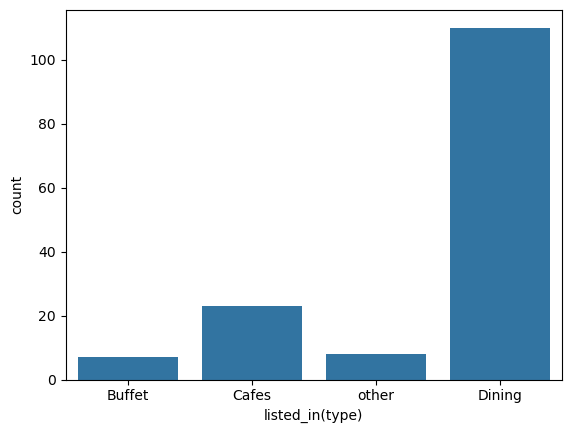

In [8]:
# Let’s explore the listed_in (type) column.
sns.countplot(x=df['listed_in(type)'])

In [9]:
 

  #  Conclusion: The majority of the restaurants fall into the dining category.


In [10]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


Text(0, 0.5, 'Votes')

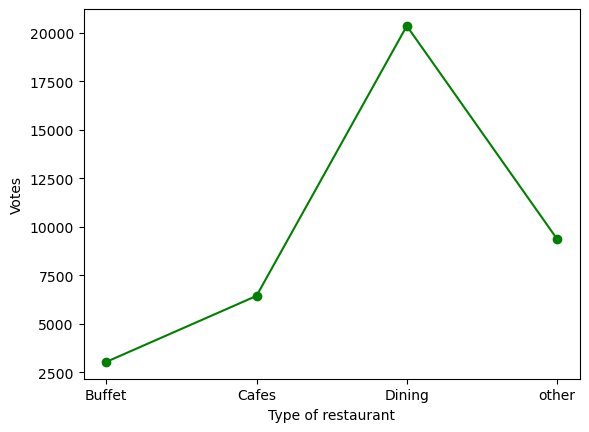

In [11]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [12]:
# Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [13]:
# Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [14]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
print('Restaurant with maximum votes:')
restaurant_with_max_votes

Restaurant with maximum votes:


38    Empire Restaurant
Name: name, dtype: object

In [15]:
# Let’s explore the online_order column.

In [16]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='count'>

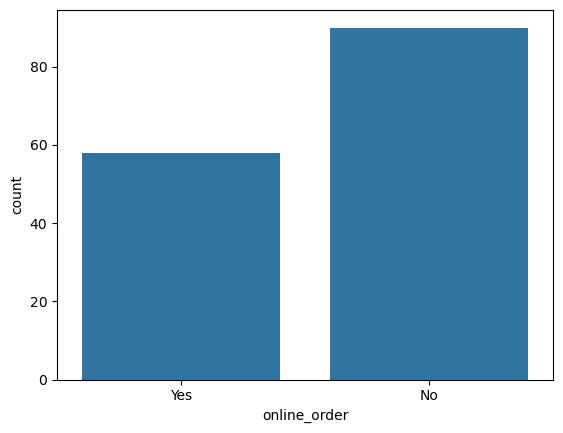

In [17]:
sns.countplot(x = df['online_order'])

In [37]:
#  Conclusion: This suggests that a majority of the restaurants do not accept online orders.


In [39]:
#Let’s explore the rate column.

In [41]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


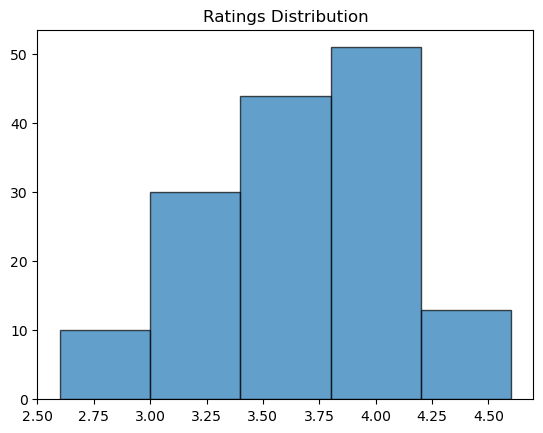

In [51]:
plt.hist(df['rate'], bins= 5, edgecolor='black', alpha= 0.7)
plt.title('Ratings Distribution')
plt.show()

In [53]:
# Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.


In [55]:
# Let’s explore the approx_cost(for two people) column.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

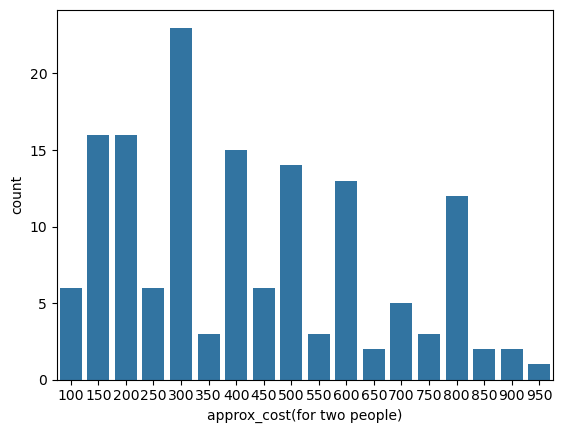

In [67]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

In [69]:
# The majority of couples prefer restaurants with an approximate cost of 300 rupees.

In [71]:
# Now we will examine whether online orders receive higher ratings than offline orders.

In [73]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


<Axes: xlabel='online_order', ylabel='rate'>

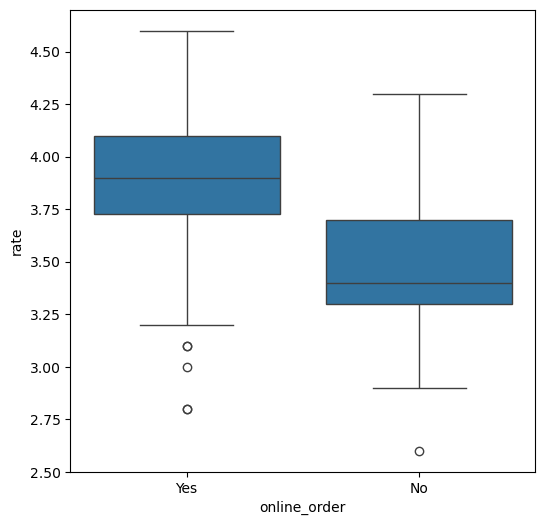

In [83]:
plt.figure(figsize=(6,6))
sns.boxplot(x ='online_order', data= df, y = 'rate')

In [85]:
'''


    CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

'''

'\n\n\n    CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.\n\n'

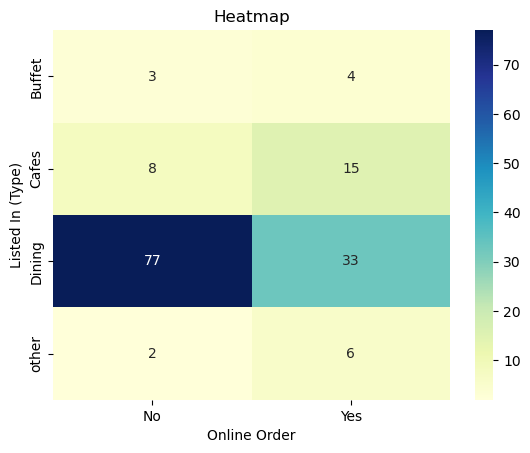

In [91]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()